In [23]:
import sys
import os
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path + "/src/simulations_v2")
from multiparam_output_loader import MultiParamOutputLoader

Load results from running one simulation that represents no reopening of University

In [33]:
output = MultiParamOutputLoader("/Users/stevewangen/projects/COVID/uw_reopening/src/simulations_v2/sim_output/1595359110.991767-asymptomatic_daily_self_report_p")

In [34]:
output.param_scenarios

['Pessimistic Faculty and Staff Parameters',
 'Optimistic Student Parameters',
 'Optimistic Faculty and Staff Parameters',
 'Pessimistic Student Parameters',
 'Nominal Student Parameters',
 'Nominal Faculty and Staff Parameters']

Load results from running one simulation that represents one reopening strategy of University

In [35]:
reopen_output = MultiParamOutputLoader("/Users/stevewangen/projects/COVID/uw_reopening/src/simulations_v2/sim_output/1595359062.49771-test_protocol_QFNR")

In [36]:
reopen_output.param_scenarios

['Optimistic Parameters', 'Nominal Parameters', 'Pessimistic Parameters']

In [37]:
def get_cum_hosp(df):
    return df[['severity_3', 'severity_2']].iloc[df.shape[0] - 1].sum()

def get_hosp_counts(scenario, noreopen_output, reopen_output):
    # scenario must be one of [Nominal, Optimistic, Pessimistic]
    
    # noreopen - non-student population
    nonstudent_key = '{} Faculty and Staff Parameters'.format(scenario)
    nonstudent_counts = [get_cum_hosp(df) for df in 
                         noreopen_output.sim_results[nonstudent_key][(0.0,)]]
    
    # noreopen - student population
    student_key = '{} Student Parameters'.format(scenario)
    student_counts = [get_cum_hosp(df) for df in 
                         noreopen_output.sim_results[student_key][(0.0,)]]
    
    noreopen_counts = [a + b for a,b in zip(nonstudent_counts, student_counts)]
    
    # reopen population
    key = '{} Parameters'.format(scenario)
    reopen_counts = [get_cum_hosp(df) for df in 
                    reopen_output.sim_results[key][(0.1,)]]
    
    return noreopen_counts, reopen_counts

In [38]:
def get_cum_outside_infections(df):
    return df['cumulative_outside_infections'].iloc[df.shape[0] - 1].sum()

def get_outside_infection_counts(scenario, noreopen_output, reopen_output):
    # scenario must be one of [Nominal, Optimistic, Pessimistic]
    
    # noreopen - non-student population
    nonstudent_key = '{} Faculty and Staff Parameters'.format(scenario)
    nonstudent_counts = [get_cum_outside_infections(df) for df in 
                         noreopen_output.sim_results[nonstudent_key][(0.0,)]]
    
    # noreopen - student population
    student_key = '{} Student Parameters'.format(scenario)
    student_counts = [get_cum_outside_infections(df) for df in 
                         noreopen_output.sim_results[student_key][(0.0,)]]
    
    
    noreopen_counts = [a + b for a,b in zip(nonstudent_counts, student_counts)]
    
    # reopen population
    key = '{} Parameters'.format(scenario)
    reopen_counts = [get_cum_outside_infections(df) for df in 
                    reopen_output.sim_results[key][(0.1,)]]
    
    return noreopen_counts, reopen_counts


    
    

In [39]:
def get_cum_infections(df):
    return df[['cumulative_mild', 'cumulative_severe']].iloc[df.shape[0] - 1].sum()

def get_infection_counts(scenario, noreopen_output, reopen_output):
    # scenario must be one of [Nominal, Optimistic, Pessimistic]
    
    # noreopen - non-student population
    nonstudent_key = '{} Faculty and Staff Parameters'.format(scenario)
    nonstudent_counts = [get_cum_infections(df) for df in 
                         noreopen_output.sim_results[nonstudent_key][(0.0,)]]
    
    # noreopen - student population
    student_key = '{} Student Parameters'.format(scenario)
    student_counts = [get_cum_infections(df) for df in 
                         noreopen_output.sim_results[student_key][(0.0,)]]
    
    noreopen_counts = [a + b for a,b in zip(nonstudent_counts, student_counts)]
    
    # reopen population
    key = '{} Parameters'.format(scenario)
    reopen_counts = [get_cum_infections(df) for df in 
                    reopen_output.sim_results[key][(0.1,)]]
    
    return noreopen_counts, reopen_counts


    
    

In [40]:
reopen_output.sim_results.keys()

dict_keys(['Optimistic Parameters', 'Nominal Parameters', 'Pessimistic Parameters'])

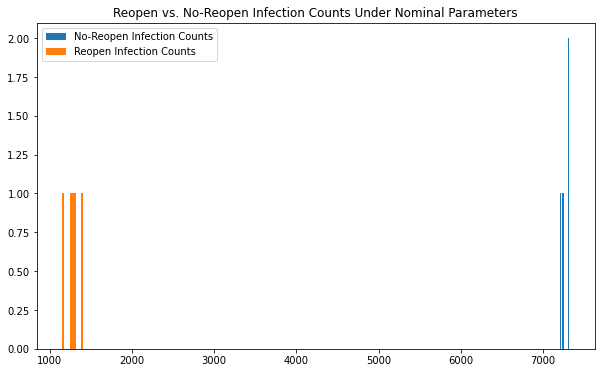

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

scenario = 'Nominal'
plt.figure(figsize=(10,6))
noreopen_counts, reopen_counts = get_infection_counts(scenario, output, reopen_output)
plt.hist(noreopen_counts, label="No-Reopen Infection Counts")
plt.hist(reopen_counts, label="Reopen Infection Counts")
plt.legend(loc='best')
plt.title('Reopen vs. No-Reopen Infection Counts Under {} Parameters'.format(scenario))
plt.show()

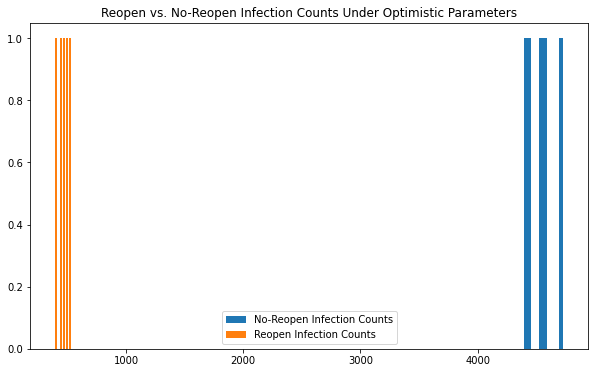

In [43]:
scenario = 'Optimistic'
plt.figure(figsize=(10,6))
noreopen_counts, reopen_counts = get_infection_counts(scenario, output, reopen_output)
plt.hist(noreopen_counts, label="No-Reopen Infection Counts")
plt.hist(reopen_counts, label="Reopen Infection Counts")
plt.legend(loc='best')
plt.title('Reopen vs. No-Reopen Infection Counts Under {} Parameters'.format(scenario))
plt.show()

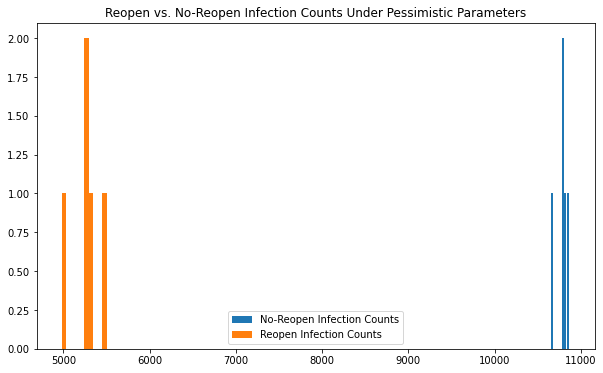

In [44]:
scenario = 'Pessimistic'
plt.figure(figsize=(10,6))
noreopen_counts, reopen_counts = get_infection_counts(scenario, output, reopen_output)
plt.hist(noreopen_counts, label="No-Reopen Infection Counts")
plt.hist(reopen_counts, label="Reopen Infection Counts")
plt.legend(loc='best')
plt.title('Reopen vs. No-Reopen Infection Counts Under {} Parameters'.format(scenario))
plt.show()

In [45]:
agedist_output = MultiParamOutputLoader("/nfs01/covid_sims/1591748288.36406-asymptomatic_daily_self_report_p")

FileNotFoundError: [Errno 2] No such file or directory: '/nfs01/covid_sims/1591748288.36406-asymptomatic_daily_self_report_p'

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

scenario = 'Nominal'
plt.figure(figsize=(10,6))
noreopen_counts, reopen_counts = get_infection_counts(scenario, agedist_output, reopen_output)
plt.hist(noreopen_counts, label="No-Reopen Infection Counts", normed=True)
plt.hist(reopen_counts, label="Reopen Infection Counts", normed=True)
plt.legend(loc='best')
plt.title('Reopen vs. No-Reopen Infection Counts Under {} Parameters'.format(scenario))
plt.show()

NameError: name 'agedist_output' is not defined

<Figure size 720x432 with 0 Axes>

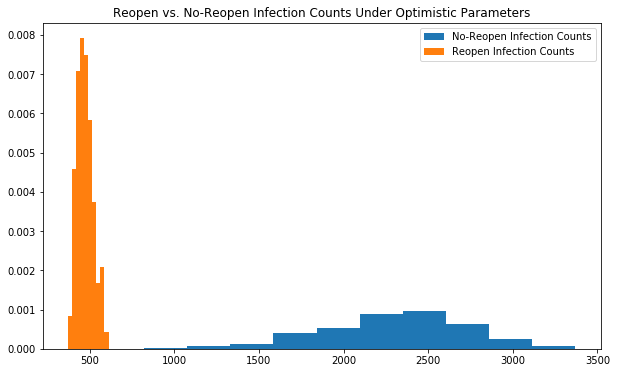

In [43]:
scenario = 'Optimistic'
plt.figure(figsize=(10,6))
noreopen_counts, reopen_counts = get_infection_counts(scenario, agedist_output, reopen_output)
plt.hist(noreopen_counts, label="No-Reopen Infection Counts", normed=True)
plt.hist(reopen_counts, label="Reopen Infection Counts", normed=True)
plt.legend(loc='best')
plt.title('Reopen vs. No-Reopen Infection Counts Under {} Parameters'.format(scenario))
plt.show()

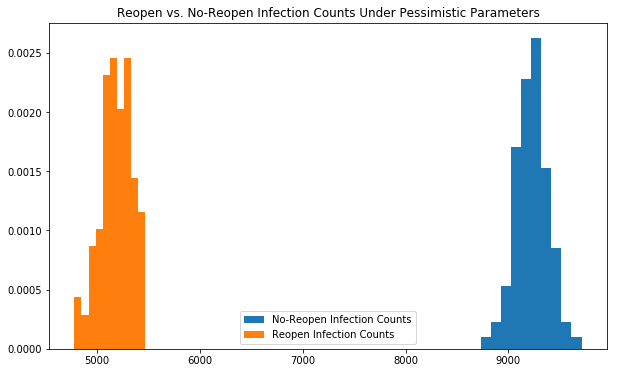

In [44]:
scenario = 'Pessimistic'
plt.figure(figsize=(10,6))
noreopen_counts, reopen_counts = get_infection_counts(scenario, agedist_output, reopen_output)
plt.hist(noreopen_counts, label="No-Reopen Infection Counts", normed=True)
plt.hist(reopen_counts, label="Reopen Infection Counts", normed=True)
plt.legend(loc='best')
plt.title('Reopen vs. No-Reopen Infection Counts Under {} Parameters'.format(scenario))
plt.show()

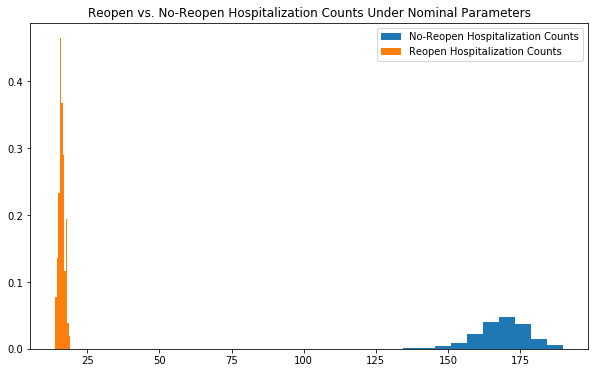

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

scenario = 'Nominal'
plt.figure(figsize=(10,6))
noreopen_counts, reopen_counts = get_hosp_counts(scenario, agedist_output, reopen_output)
plt.hist(noreopen_counts, label="No-Reopen Hospitalization Counts", normed=True)
plt.hist(reopen_counts, label="Reopen Hospitalization Counts", normed=True)
plt.legend(loc='best')
plt.title('Reopen vs. No-Reopen Hospitalization Counts Under {} Parameters'.format(scenario))
plt.show()

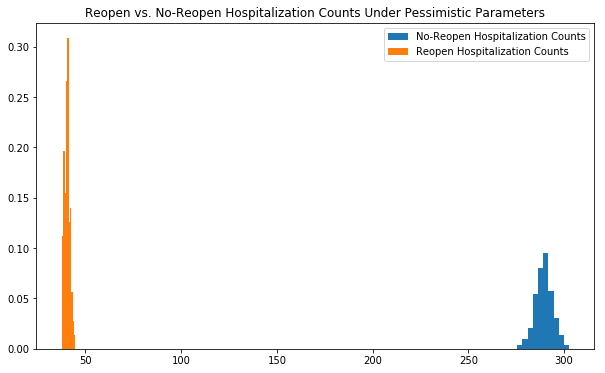

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

scenario = 'Pessimistic'
plt.figure(figsize=(10,6))
noreopen_counts, reopen_counts = get_hosp_counts(scenario, agedist_output, reopen_output)
plt.hist(noreopen_counts, label="No-Reopen Hospitalization Counts", normed=True)
plt.hist(reopen_counts, label="Reopen Hospitalization Counts", normed=True)
plt.legend(loc='best')
plt.title('Reopen vs. No-Reopen Hospitalization Counts Under {} Parameters'.format(scenario))
plt.show()

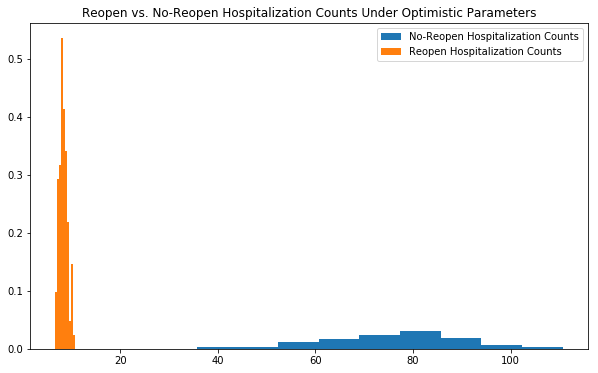

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

scenario = 'Optimistic'
plt.figure(figsize=(10,6))
noreopen_counts, reopen_counts = get_hosp_counts(scenario, agedist_output, reopen_output)
plt.hist(noreopen_counts, label="No-Reopen Hospitalization Counts", normed=True)
plt.hist(reopen_counts, label="Reopen Hospitalization Counts", normed=True)
plt.legend(loc='best')
plt.title('Reopen vs. No-Reopen Hospitalization Counts Under {} Parameters'.format(scenario))
plt.show()

In [34]:
output.sim_results['Optimistic Faculty and Staff Parameters'][(0.0,)][0].columns

Index(['S', 'QS', 'QI', 'R', 'E_0', 'E_1', 'E_2', 'E_3', 'E_4', 'E_5', 'E_6',
       'pre_ID_0', 'pre_ID_1', 'pre_ID_2', 'pre_ID_3', 'ID_0', 'ID_1', 'ID_2',
       'ID_3', 'ID_4', 'ID_5', 'ID_6', 'ID_7', 'SyID_mild_0', 'SyID_mild_1',
       'SyID_mild_2', 'SyID_mild_3', 'SyID_mild_4', 'SyID_mild_5',
       'SyID_mild_6', 'SyID_mild_7', 'SyID_mild_8', 'SyID_mild_9',
       'SyID_mild_10', 'SyID_mild_11', 'SyID_mild_12', 'SyID_mild_13',
       'SyID_mild_14', 'SyID_mild_15', 'SyID_mild_16', 'SyID_mild_17',
       'SyID_severe_0', 'SyID_severe_1', 'SyID_severe_2', 'SyID_severe_3',
       'SyID_severe_4', 'SyID_severe_5', 'SyID_severe_6', 'SyID_severe_7',
       'SyID_severe_8', 'SyID_severe_9', 'SyID_severe_10', 'SyID_severe_11',
       'SyID_severe_12', 'SyID_severe_13', 'SyID_severe_14', 'SyID_severe_15',
       'SyID_severe_16', 'SyID_severe_17', 'cumulative_mild',
       'cumulative_severe', 'cumulative_outside_infections', 'severity_0',
       'severity_1', 'severity_2', 'severity_3'

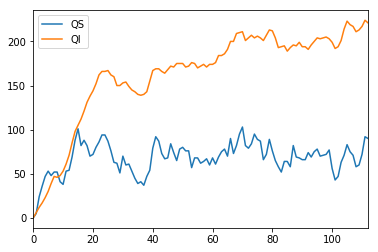

In [51]:
reopen_output.sim_results['Nominal Parameters'][(0.1,)][0][['QS','QI']].plot()

In [69]:
reopen_output.sim_results['Nominal Parameters'][(0.1,)][1].keys()

Index(['S', 'QS', 'QI', 'R', 'E_0', 'E_1', 'E_2', 'E_3', 'E_4', 'E_5', 'E_6',
       'pre_ID_0', 'pre_ID_1', 'pre_ID_2', 'pre_ID_3', 'ID_0', 'ID_1', 'ID_2',
       'ID_3', 'ID_4', 'ID_5', 'ID_6', 'ID_7', 'SyID_mild_0', 'SyID_mild_1',
       'SyID_mild_2', 'SyID_mild_3', 'SyID_mild_4', 'SyID_mild_5',
       'SyID_mild_6', 'SyID_mild_7', 'SyID_mild_8', 'SyID_mild_9',
       'SyID_mild_10', 'SyID_mild_11', 'SyID_mild_12', 'SyID_mild_13',
       'SyID_mild_14', 'SyID_mild_15', 'SyID_mild_16', 'SyID_mild_17',
       'SyID_mild_18', 'SyID_mild_19', 'SyID_severe_0', 'SyID_severe_1',
       'SyID_severe_2', 'SyID_severe_3', 'SyID_severe_4', 'SyID_severe_5',
       'SyID_severe_6', 'SyID_severe_7', 'SyID_severe_8', 'SyID_severe_9',
       'SyID_severe_10', 'SyID_severe_11', 'SyID_severe_12', 'SyID_severe_13',
       'SyID_severe_14', 'SyID_severe_15', 'SyID_severe_16', 'SyID_severe_17',
       'SyID_severe_18', 'SyID_severe_19', 'cumulative_mild',
       'cumulative_severe', 'cumulative_outside

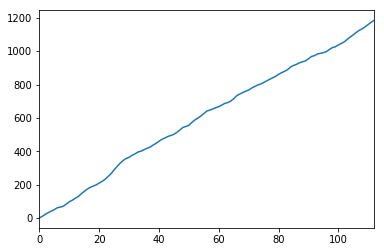

In [72]:
reopen_output.sim_results['Nominal Parameters'][(0.1,)][1][['severity_0', 'severity_1', 'severity_2', 'severity_3']].sum(axis=1).plot()

In [75]:
severe_infections = []
total_infections = []
for df in reopen_output.sim_results['Nominal Parameters'][(0.1,)]:
    severe_infections.append(df['cumulative_severe'].iloc[df.shape[0] - 1])
    total_infections.append(df[['cumulative_mild', 'cumulative_severe']].sum(axis=1).iloc[df.shape[0] - 1])

In [76]:
np.quantile(severe_infections, 0.5)

656.5

In [77]:
np.quantile(total_infections, 0.5)

1254.0

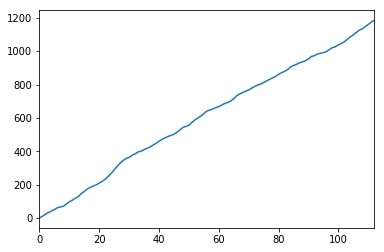

In [71]:
reopen_output.sim_results['Nominal Parameters'][(0.1,)][1][['cumulative_mild','cumulative_severe']].sum(axis=1).plot()

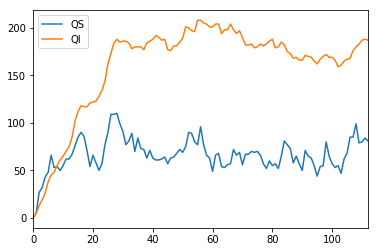

In [52]:
reopen_output.sim_results['Nominal Parameters'][(0.1,)][1][['QS','QI']].plot()

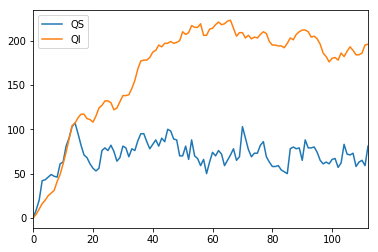

In [53]:
reopen_output.sim_results['Nominal Parameters'][(0.1,)][2][['QS','QI']].plot()

In [54]:
agedist_output = MultiParamOutputLoader("/nfs01/covid_sims/1591800602.9895172-asymptomatic_daily_self_report_p")

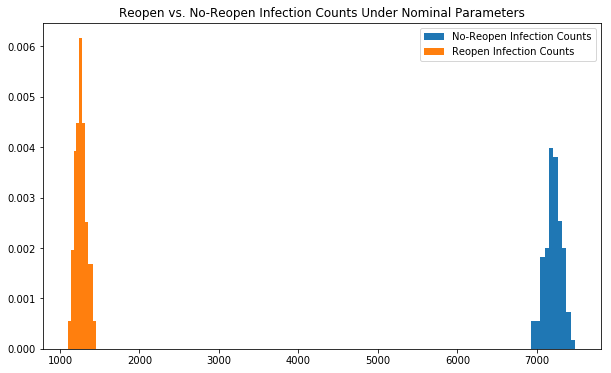

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

scenario = 'Nominal'
plt.figure(figsize=(10,6))
noreopen_counts, reopen_counts = get_infection_counts(scenario, agedist_output, reopen_output)
plt.hist(noreopen_counts, label="No-Reopen Infection Counts", normed=True)
plt.hist(reopen_counts, label="Reopen Infection Counts", normed=True)
plt.legend(loc='best')
plt.title('Reopen vs. No-Reopen Infection Counts Under {} Parameters'.format(scenario))
plt.show()

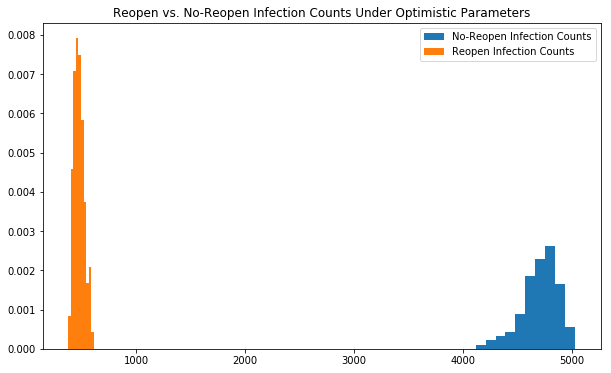

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

scenario = 'Optimistic'
plt.figure(figsize=(10,6))
noreopen_counts, reopen_counts = get_infection_counts(scenario, agedist_output, reopen_output)
plt.hist(noreopen_counts, label="No-Reopen Infection Counts", normed=True)
plt.hist(reopen_counts, label="Reopen Infection Counts", normed=True)
plt.legend(loc='best')
plt.title('Reopen vs. No-Reopen Infection Counts Under {} Parameters'.format(scenario))
plt.show()

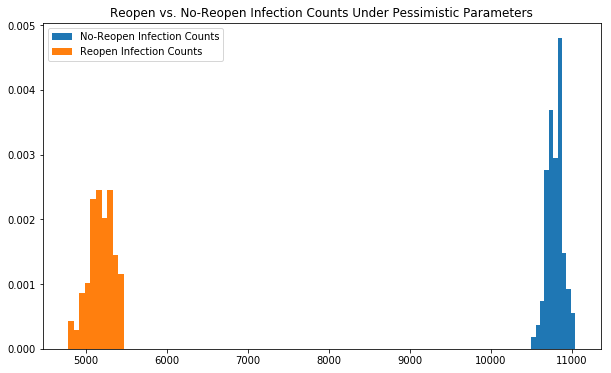

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

scenario = 'Pessimistic'
plt.figure(figsize=(10,6))
noreopen_counts, reopen_counts = get_infection_counts(scenario, agedist_output, reopen_output)
plt.hist(noreopen_counts, label="No-Reopen Infection Counts", normed=True)
plt.hist(reopen_counts, label="Reopen Infection Counts", normed=True)
plt.legend(loc='best')
plt.title('Reopen vs. No-Reopen Infection Counts Under {} Parameters'.format(scenario))
plt.show()

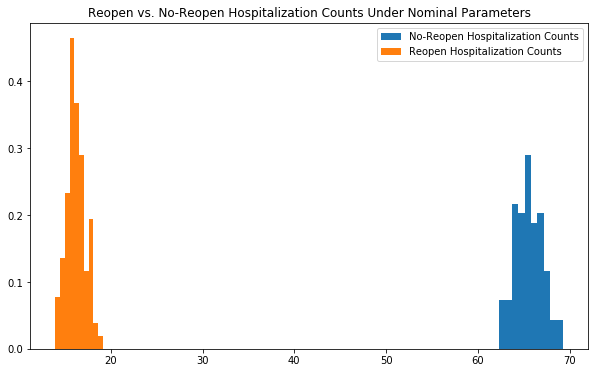

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

scenario = 'Nominal'
plt.figure(figsize=(10,6))
noreopen_counts, reopen_counts = get_hosp_counts(scenario, agedist_output, reopen_output)
plt.hist(noreopen_counts, label="No-Reopen Hospitalization Counts", normed=True)
plt.hist(reopen_counts, label="Reopen Hospitalization Counts", normed=True)
plt.legend(loc='best')
plt.title('Reopen vs. No-Reopen Hospitalization Counts Under {} Parameters'.format(scenario))
plt.show()

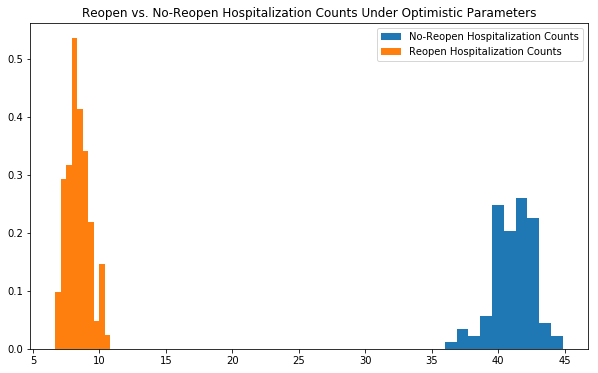

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

scenario = 'Optimistic'
plt.figure(figsize=(10,6))
noreopen_counts, reopen_counts = get_hosp_counts(scenario, agedist_output, reopen_output)
plt.hist(noreopen_counts, label="No-Reopen Hospitalization Counts", normed=True)
plt.hist(reopen_counts, label="Reopen Hospitalization Counts", normed=True)
plt.legend(loc='best')
plt.title('Reopen vs. No-Reopen Hospitalization Counts Under {} Parameters'.format(scenario))
plt.show()

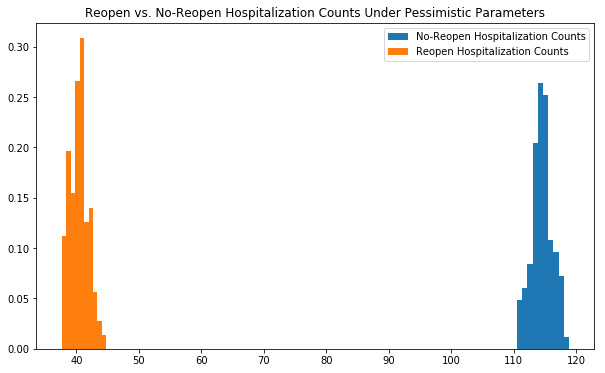

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

scenario = 'Pessimistic'
plt.figure(figsize=(10,6))
noreopen_counts, reopen_counts = get_hosp_counts(scenario, agedist_output, reopen_output)
plt.hist(noreopen_counts, label="No-Reopen Hospitalization Counts", normed=True)
plt.hist(reopen_counts, label="Reopen Hospitalization Counts", normed=True)
plt.legend(loc='best')
plt.title('Reopen vs. No-Reopen Hospitalization Counts Under {} Parameters'.format(scenario))
plt.show()

In [ ]:
"/nfs01/covid_sims//1591813794.7398381-asymptomatic_daily_self_report_p"

In [61]:
agedist_output = MultiParamOutputLoader("/nfs01/covid_sims//1591813794.7398381-asymptomatic_daily_self_report_p")

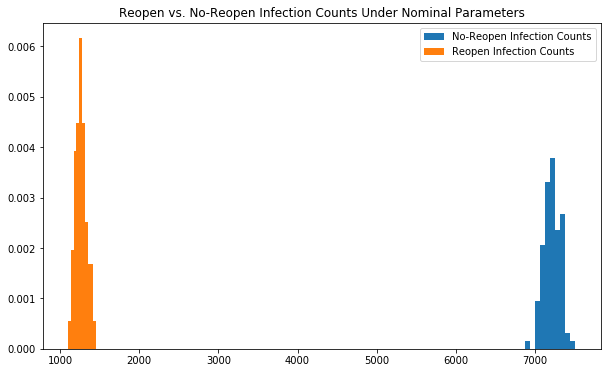

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

scenario = 'Nominal'
plt.figure(figsize=(10,6))
noreopen_counts, reopen_counts = get_infection_counts(scenario, agedist_output, reopen_output)
plt.hist(noreopen_counts, label="No-Reopen Infection Counts", normed=True)
plt.hist(reopen_counts, label="Reopen Infection Counts", normed=True)
plt.legend(loc='best')
plt.title('Reopen vs. No-Reopen Infection Counts Under {} Parameters'.format(scenario))
plt.show()

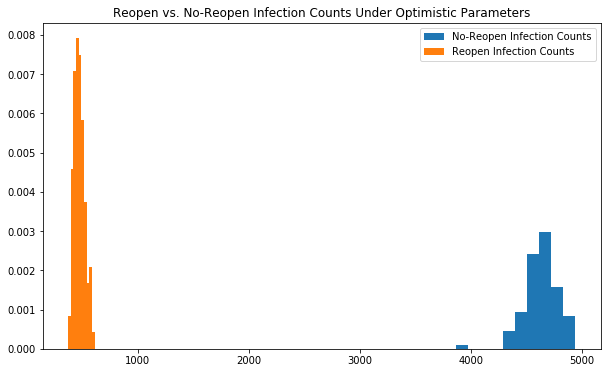

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

scenario = 'Optimistic'
plt.figure(figsize=(10,6))
noreopen_counts, reopen_counts = get_infection_counts(scenario, agedist_output, reopen_output)
plt.hist(noreopen_counts, label="No-Reopen Infection Counts", normed=True)
plt.hist(reopen_counts, label="Reopen Infection Counts", normed=True)
plt.legend(loc='best')
plt.title('Reopen vs. No-Reopen Infection Counts Under {} Parameters'.format(scenario))
plt.show()

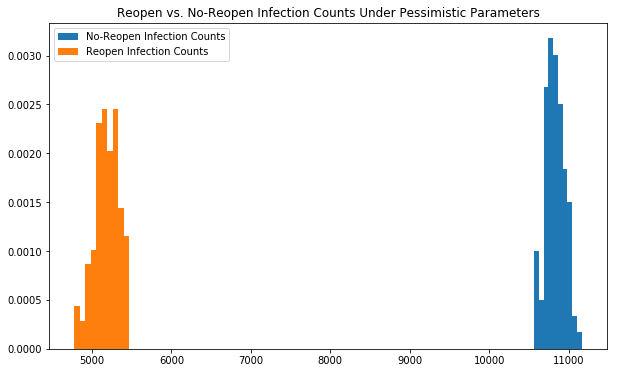

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

scenario = 'Pessimistic'
plt.figure(figsize=(10,6))
noreopen_counts, reopen_counts = get_infection_counts(scenario, agedist_output, reopen_output)
plt.hist(noreopen_counts, label="No-Reopen Infection Counts", normed=True)
plt.hist(reopen_counts, label="Reopen Infection Counts", normed=True)
plt.legend(loc='best')
plt.title('Reopen vs. No-Reopen Infection Counts Under {} Parameters'.format(scenario))
plt.show()

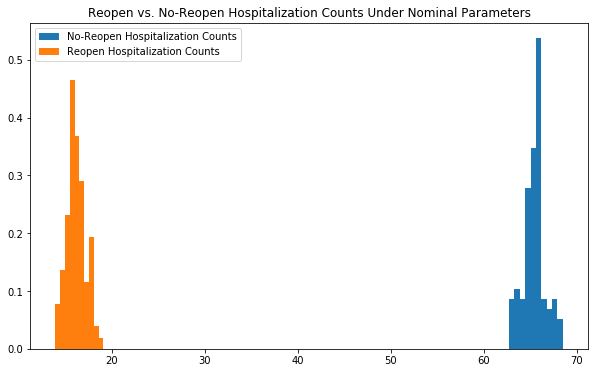

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

scenario = 'Nominal'
plt.figure(figsize=(10,6))
noreopen_counts, reopen_counts = get_hosp_counts(scenario, agedist_output, reopen_output)
plt.hist(noreopen_counts, label="No-Reopen Hospitalization Counts", normed=True)
plt.hist(reopen_counts, label="Reopen Hospitalization Counts", normed=True)
plt.legend(loc='best')
plt.title('Reopen vs. No-Reopen Hospitalization Counts Under {} Parameters'.format(scenario))
plt.show()

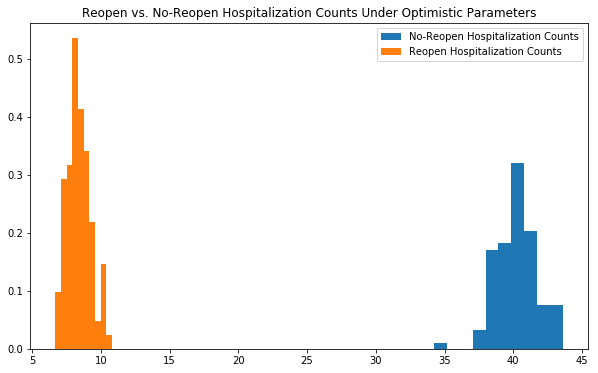

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

scenario = 'Optimistic'
plt.figure(figsize=(10,6))
noreopen_counts, reopen_counts = get_hosp_counts(scenario, agedist_output, reopen_output)
plt.hist(noreopen_counts, label="No-Reopen Hospitalization Counts", normed=True)
plt.hist(reopen_counts, label="Reopen Hospitalization Counts", normed=True)
plt.legend(loc='best')
plt.title('Reopen vs. No-Reopen Hospitalization Counts Under {} Parameters'.format(scenario))
plt.show()

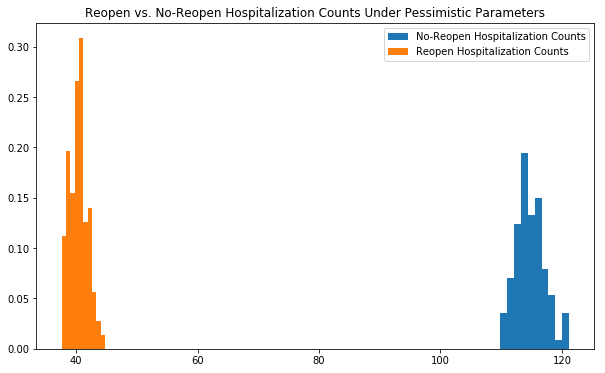

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

scenario = 'Pessimistic'
plt.figure(figsize=(10,6))
noreopen_counts, reopen_counts = get_hosp_counts(scenario, agedist_output, reopen_output)
plt.hist(noreopen_counts, label="No-Reopen Hospitalization Counts", normed=True)
plt.hist(reopen_counts, label="Reopen Hospitalization Counts", normed=True)
plt.legend(loc='best')
plt.title('Reopen vs. No-Reopen Hospitalization Counts Under {} Parameters'.format(scenario))
plt.show()

In [79]:
noreopen_counts, reopen_counts = get_hosp_counts('Nominal', agedist_output, reopen_output)

In [80]:
np.quantile(noreopen_counts, 0.5)

65.48306622696632

In [81]:
np.quantile(noreopen_counts, 0.5) * 0.34 / ( 0.94 + 0.34) 

17.393939466537926

In [94]:
noreopen_counts, reopen_counts = get_outside_infection_counts('Nominal', agedist_output, reopen_output)

In [95]:
np.quantile(reopen_counts, 0.5)

573.0

In [96]:
np.quantile(noreopen_counts, 0.5)

335.0

In [92]:
agedist_output.sim_results['Nominal Student Parameters'][(0.0,)][0].columns

Index(['S', 'QS', 'QI', 'R', 'E_0', 'E_1', 'E_2', 'E_3', 'E_4', 'E_5', 'E_6',
       'pre_ID_0', 'pre_ID_1', 'pre_ID_2', 'pre_ID_3', 'ID_0', 'ID_1', 'ID_2',
       'ID_3', 'ID_4', 'ID_5', 'ID_6', 'ID_7', 'SyID_mild_0', 'SyID_mild_1',
       'SyID_mild_2', 'SyID_mild_3', 'SyID_mild_4', 'SyID_mild_5',
       'SyID_mild_6', 'SyID_mild_7', 'SyID_mild_8', 'SyID_mild_9',
       'SyID_mild_10', 'SyID_mild_11', 'SyID_mild_12', 'SyID_mild_13',
       'SyID_mild_14', 'SyID_mild_15', 'SyID_mild_16', 'SyID_mild_17',
       'SyID_mild_18', 'SyID_mild_19', 'SyID_severe_0', 'SyID_severe_1',
       'SyID_severe_2', 'SyID_severe_3', 'SyID_severe_4', 'SyID_severe_5',
       'SyID_severe_6', 'SyID_severe_7', 'SyID_severe_8', 'SyID_severe_9',
       'SyID_severe_10', 'SyID_severe_11', 'SyID_severe_12', 'SyID_severe_13',
       'SyID_severe_14', 'SyID_severe_15', 'SyID_severe_16', 'SyID_severe_17',
       'SyID_severe_18', 'SyID_severe_19', 'cumulative_mild',
       'cumulative_severe', 'cumulative_outside

# Additional plots for Martha


In [101]:
agedist_output = MultiParamOutputLoader("/nfs01/covid_sims//1592071092.1757104-asymptomatic_daily_self_report_p")


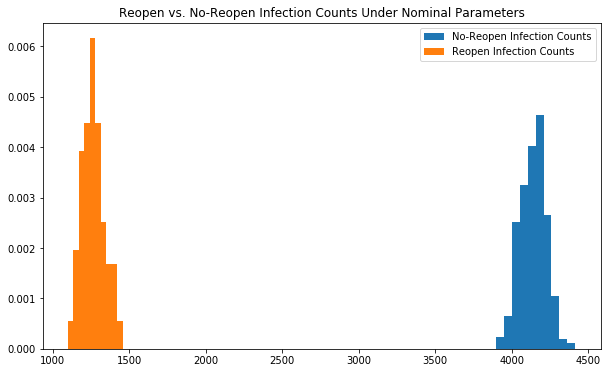

In [102]:
import matplotlib.pyplot as plt
%matplotlib inline

scenario = 'Nominal'
plt.figure(figsize=(10,6))
noreopen_counts, reopen_counts = get_infection_counts(scenario, agedist_output, reopen_output)
plt.hist(noreopen_counts, label="No-Reopen Infection Counts", normed=True)
plt.hist(reopen_counts, label="Reopen Infection Counts", normed=True)
plt.legend(loc='best')
plt.title('Reopen vs. No-Reopen Infection Counts Under {} Parameters'.format(scenario))
plt.show()

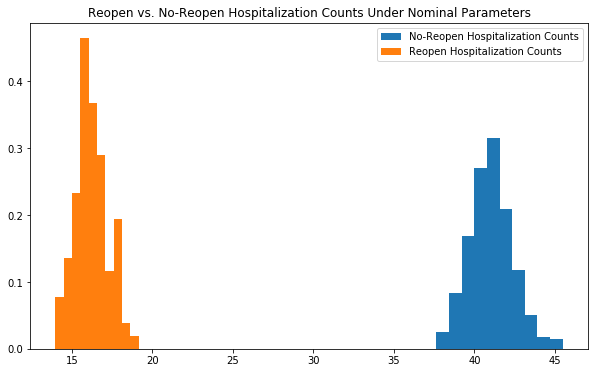

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline

scenario = 'Nominal'
plt.figure(figsize=(10,6))
noreopen_counts, reopen_counts = get_hosp_counts(scenario, agedist_output, reopen_output)
plt.hist(noreopen_counts, label="No-Reopen Hospitalization Counts", normed=True)
plt.hist(reopen_counts, label="Reopen Hospitalization Counts", normed=True)
plt.legend(loc='best')
plt.title('Reopen vs. No-Reopen Hospitalization Counts Under {} Parameters'.format(scenario))
plt.show()

In [111]:
def get_cum_infections(df):
    return df[['cumulative_mild', 'cumulative_severe']].iloc[df.shape[0] - 1].sum()

def get_infection_counts(scenario, noreopen_output, reopen_output):
    # scenario must be one of [Nominal, Optimistic, Pessimistic]
    
    # noreopen - non-student population
    nonstudent_key = '{} Faculty and Staff Parameters'.format(scenario)
    nonstudent_counts = [get_cum_infections(df) for df in 
                         noreopen_output.sim_results[nonstudent_key][(0.0,)]]
    
    # noreopen - student population
    student_key = '{} Student Parameters'.format(scenario)
    student_counts = [get_cum_infections(df) for df in 
                         noreopen_output.sim_results[student_key][(0.0,)]]
    
    #print(np.quantile(nonstudent_counts, 0.5))
    print(np.mean(nonstudent_counts))
    noreopen_counts = [a + b for a,b in zip(nonstudent_counts, student_counts)]
    
    # reopen population
    key = '{} Parameters'.format(scenario)
    reopen_counts = [get_cum_infections(df) for df in 
                    reopen_output.sim_results[key][(0.1,)]]
    
    return noreopen_counts, reopen_counts


    
    


    
get_infection_counts(scenario, agedist_output, reopen_output)

594.268


([4206,
  4178,
  4109,
  4416,
  4096,
  4131,
  4171,
  4224,
  4067,
  4067,
  4117,
  4096,
  4234,
  4186,
  4152,
  4153,
  4082,
  4030,
  4047,
  4120,
  4107,
  4347,
  4219,
  4079,
  4032,
  4253,
  4247,
  4181,
  4111,
  4047,
  4157,
  3955,
  4365,
  4131,
  4219,
  4275,
  4111,
  4077,
  4281,
  4155,
  4049,
  4153,
  4178,
  4209,
  4191,
  4080,
  4151,
  4237,
  4071,
  4046,
  4078,
  4204,
  4210,
  4239,
  4065,
  4095,
  4224,
  4141,
  4111,
  4124,
  4117,
  4060,
  4103,
  4189,
  4064,
  4105,
  4235,
  4107,
  4107,
  4155,
  4090,
  4007,
  4023,
  4085,
  4176,
  3995,
  4078,
  4236,
  4044,
  4235,
  4155,
  4175,
  4038,
  4162,
  4220,
  4078,
  4042,
  4280,
  4167,
  4122,
  4223,
  4284,
  4091,
  4120,
  4155,
  4186,
  4151,
  4228,
  4172,
  4234,
  4112,
  4172,
  4142,
  4177,
  4202,
  4162,
  4235,
  4203,
  4261,
  4266,
  4189,
  4192,
  4051,
  4185,
  4208,
  4134,
  4035,
  4202,
  4077,
  4096,
  4080,
  4260,
  4187,
  4248,
  4175,


In [112]:
scenario

'Nominal'

In [110]:
def get_cum_hosp(df):
    return df[['severity_3', 'severity_2']].iloc[df.shape[0] - 1].sum()

def get_hosp_counts(scenario, noreopen_output, reopen_output):
    # scenario must be one of [Nominal, Optimistic, Pessimistic]
    
    # noreopen - non-student population
    nonstudent_key = '{} Faculty and Staff Parameters'.format(scenario)
    nonstudent_counts = [get_cum_hosp(df) for df in 
                         noreopen_output.sim_results[nonstudent_key][(0.0,)]]
    
    # noreopen - student population
    student_key = '{} Student Parameters'.format(scenario)
    student_counts = [get_cum_hosp(df) for df in 
                         noreopen_output.sim_results[student_key][(0.0,)]]
    
    #print(np.quantile(nonstudent_counts, 0.5))
    print(np.mean(nonstudent_counts))
    noreopen_counts = [a + b for a,b in zip(nonstudent_counts, student_counts)]
    
    # reopen population
    key = '{} Parameters'.format(scenario)
    reopen_counts = [get_cum_hosp(df) for df in 
                    reopen_output.sim_results[key][(0.1,)]]
    
    return noreopen_counts, reopen_counts


get_hosp_counts(scenario, agedist_output, reopen_output)

12.692226371571905


([40.494143847343636,
  41.4123280048598,
  40.7841070894868,
  45.48449182317372,
  40.36365312886585,
  43.043011090181054,
  40.490736998296626,
  43.48467990123754,
  39.45134227912458,
  40.167440422820135,
  41.11535869777917,
  41.40551001798615,
  42.63941187429059,
  41.38751822731345,
  40.54016847532552,
  41.71725234475631,
  40.03713778240616,
  38.595468971349675,
  38.671415794838246,
  40.542630645273775,
  40.73600073646395,
  44.96593150952991,
  43.18865527325566,
  40.581456841474726,
  40.414221651836954,
  42.541117443203916,
  41.73202536444583,
  41.76895791366964,
  41.17388225356614,
  39.789599952354415,
  39.70834834406205,
  39.11819702385507,
  44.339604241134055,
  40.79073699829663,
  41.70058567808964,
  41.92274520762392,
  41.50399681591629,
  41.530888318503614,
  43.248503953048676,
  40.852479325066795,
  39.29168167739539,
  40.250017155118535,
  41.08031979553251,
  43.47861851539882,
  42.58429945633026,
  41.24130552126773,
  40.14831158620521,

In [109]:
def get_cum_outside_infections(df):
    return df['cumulative_outside_infections'].iloc[df.shape[0] - 1].sum()

def get_outside_infection_counts(scenario, noreopen_output, reopen_output):
    # scenario must be one of [Nominal, Optimistic, Pessimistic]
    
    # noreopen - non-student population
    nonstudent_key = '{} Faculty and Staff Parameters'.format(scenario)
    nonstudent_counts = [get_cum_outside_infections(df) for df in 
                         noreopen_output.sim_results[nonstudent_key][(0.0,)]]
    
    # noreopen - student population
    student_key = '{} Student Parameters'.format(scenario)
    student_counts = [get_cum_outside_infections(df) for df in 
                         noreopen_output.sim_results[student_key][(0.0,)]]
    
    print(np.quantile(nonstudent_counts, 0.5))
    noreopen_counts = [a + b for a,b in zip(nonstudent_counts, student_counts)]
    
    # reopen population
    key = '{} Parameters'.format(scenario)
    reopen_counts = [get_cum_outside_infections(df) for df in 
                    reopen_output.sim_results[key][(0.1,)]]
    
    return noreopen_counts, reopen_counts


get_outside_infection_counts(scenario, agedist_output, reopen_output)
    

250.5


([297,
  319,
  311,
  314,
  290,
  271,
  288,
  302,
  300,
  294,
  317,
  315,
  263,
  306,
  292,
  276,
  298,
  300,
  267,
  295,
  275,
  292,
  276,
  305,
  300,
  324,
  315,
  315,
  299,
  286,
  276,
  308,
  301,
  280,
  294,
  286,
  307,
  297,
  307,
  308,
  286,
  296,
  297,
  294,
  292,
  312,
  303,
  290,
  312,
  283,
  276,
  293,
  320,
  307,
  295,
  278,
  305,
  272,
  299,
  321,
  297,
  302,
  269,
  315,
  285,
  290,
  321,
  277,
  293,
  325,
  288,
  307,
  274,
  298,
  308,
  295,
  301,
  316,
  289,
  299,
  309,
  299,
  275,
  290,
  305,
  287,
  305,
  355,
  274,
  306,
  269,
  307,
  293,
  291,
  306,
  295,
  305,
  304,
  317,
  299,
  318,
  278,
  296,
  333,
  295,
  264,
  299,
  326,
  314,
  300,
  285,
  316,
  291,
  286,
  320,
  264,
  330,
  298,
  286,
  295,
  297,
  313,
  300,
  312,
  280,
  319,
  282,
  273,
  283,
  292,
  305,
  290,
  324,
  294,
  299,
  260,
  307,
  270,
  304,
  273,
  288,
  342,
  334,